У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_path = 'Python_study/data/yulu_rental.csv'
df = pd.read_csv(data_path)

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

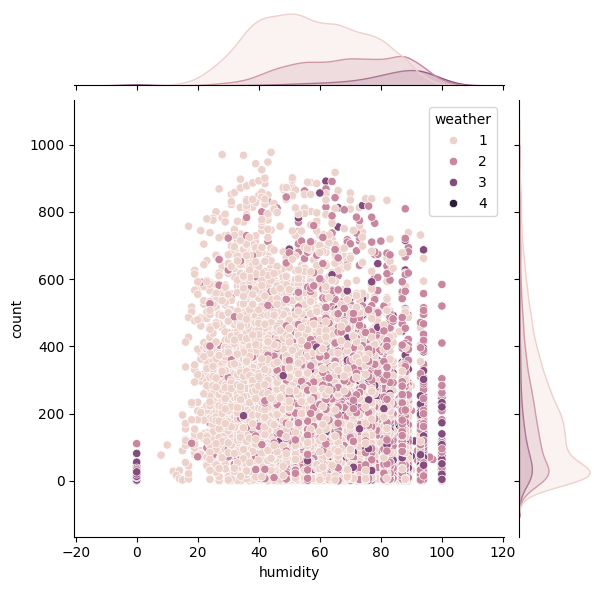

In [24]:
weather_change = sns.jointplot(data=df, x='humidity', y='count', hue='weather')
plt.show(1)

Загальна кількість взятих в оренду велосипедів найбільша під час хорошої погоди (позначеної 1 та 2), найменша кількість під час поганої погоди та підвищеної вологості.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

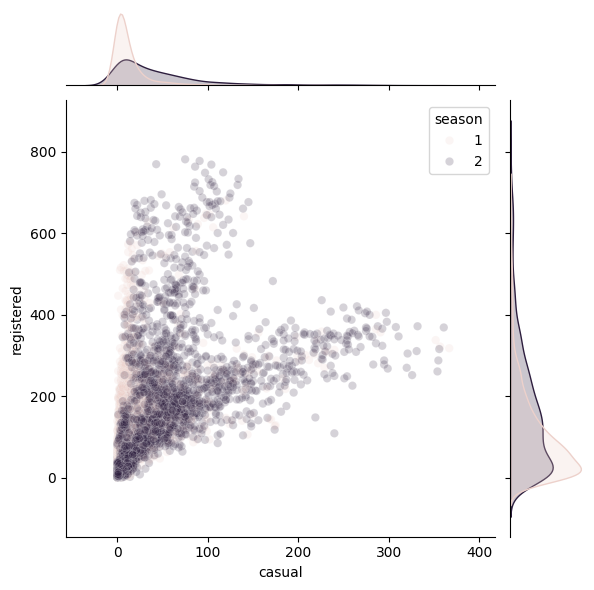

In [26]:
spring_summer_data = df[df['season'].isin([1, 2])]
sns.jointplot(data=spring_summer_data, x='casual', y='registered', hue='season', alpha=0.2)

plt.show()

Графік дозволяє побачити різницю між кількістю неформальних та зареєстрованих користувачів у різні сезони.
За допомогою кольорового позначення різних сезонів можна побачити, як сезон впливає на користування послугами. 
На основі цього аналізу можна прийняти рішення щодо маркетингових кампаній або оптимізації кількості доступних велосипедів у різні сезони, виходячи з того, коли попит на них є найбільшим.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


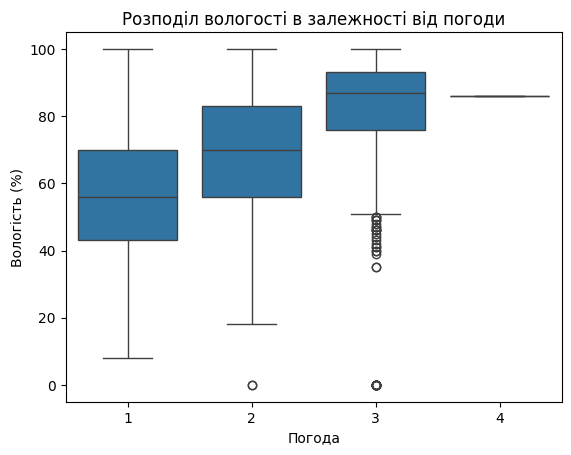

In [29]:
sns.boxplot(data=df, x='weather', y='humidity')
plt.title('Розподіл вологості в залежності від погоди')
plt.xlabel('Погода')
plt.ylabel('Вологість (%)')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

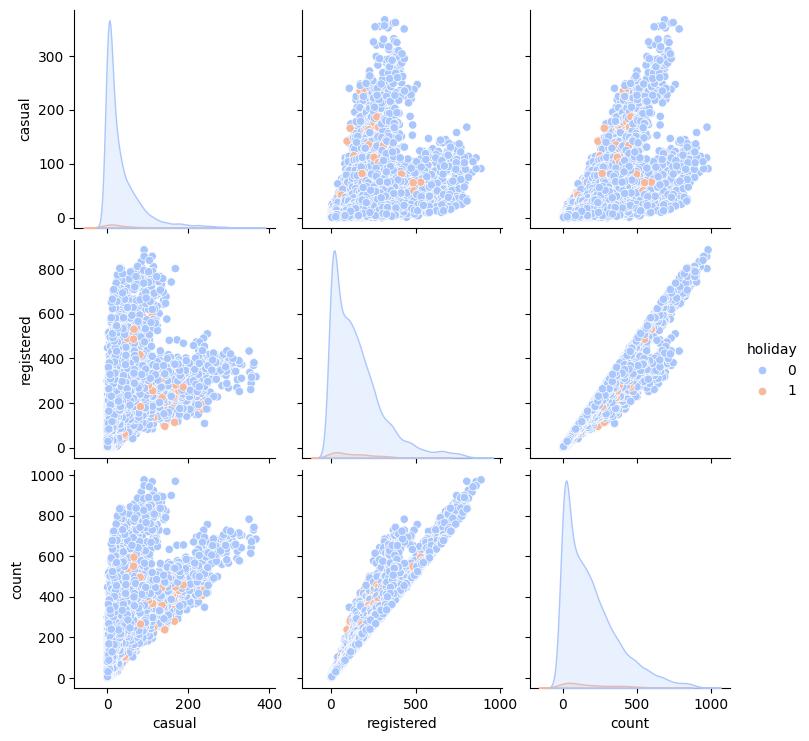

In [30]:
filtered_df = df[['casual', 'registered', 'count', 'holiday']]
sns.pairplot(data=filtered_df, hue='holiday', palette='coolwarm')
plt.show()

На графіках видно, що кількість точок, що відповідають святковим дням (позначені іншим кольором, помаранчевим), відносно невелика. Однак можна помітити, що в святкові дні частіше здійснюють прокати незареєстровані користувачі, ніж зареєстровані.
Зареєстровані користувачі в робочі дні активніші. Можливо, вони частіше використовують велосипеди для регулярних поїздок на роботу чи навчання.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [33]:
df['datetime'] = pd.to_datetime(df['datetime'])

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [34]:
df['date'] = df['datetime'].dt.date

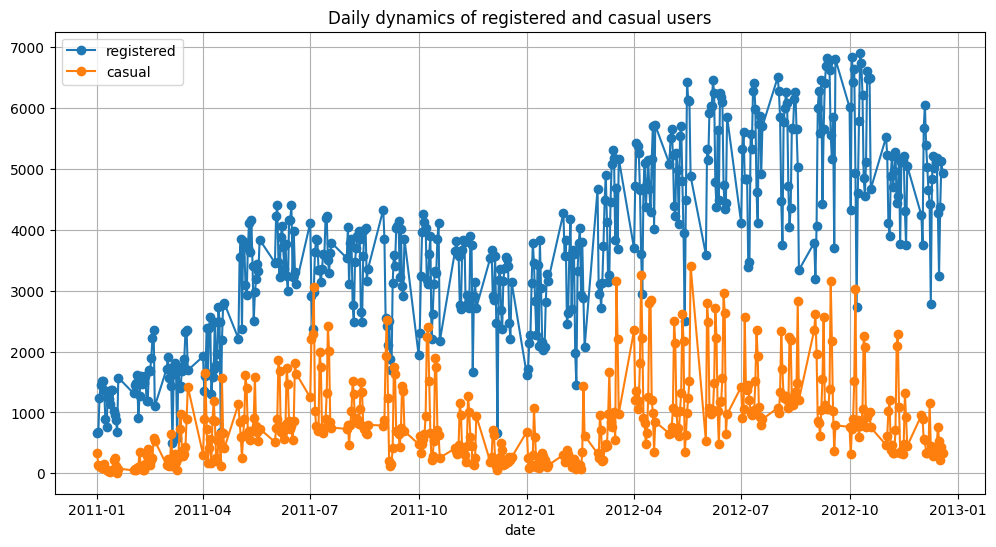

In [36]:
df_viz = df[['date', 'registered', 'casual']]
df_viz = df_viz.groupby('date').sum().reset_index()
df_viz.plot(x='date', y=['registered', 'casual'], figsize=(12, 6), marker='o', title="Daily dynamics of registered and casual users", grid=True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
